In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [111]:
df_train = pd.read_csv('D:/git_titanic/train.csv')

In [112]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 성별과 나이 데이터 결측치 제거  및 시각화

In [113]:
df_train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [114]:
# 크로스 테이블로 상관관계 확인

pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


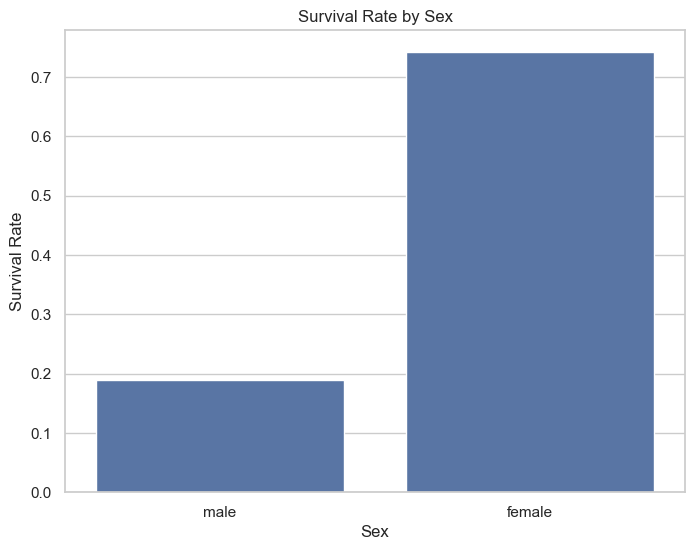

In [115]:
# 성별에 따른 생존률 - 시각화

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df_train, ci=None)

plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')

plt.show()


In [116]:
# 연령

In [117]:
# 연령의 결측치를 평균mean으로 대체

# 대체 전
print(df_train['Age'].isnull().sum() )

# 대체 후
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Age'].isnull().sum() 


177


0

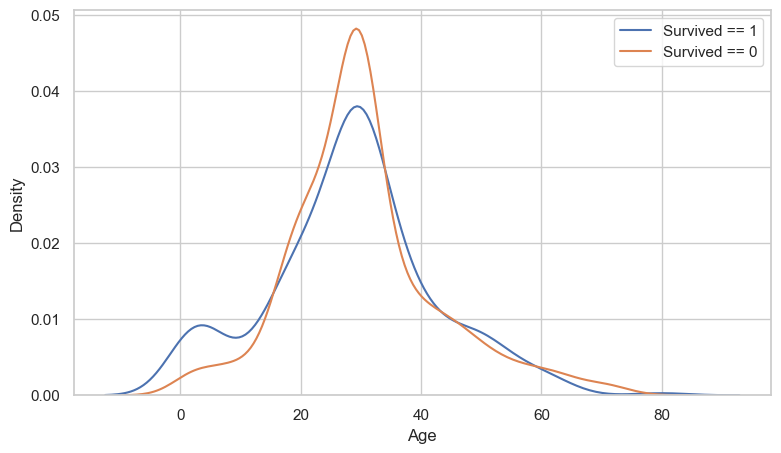

In [122]:
# 카테고리화 이전
# 연령에 따른 생존률 - 시각화
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [118]:
# 연령 값을 넘버로 카테고리화

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)

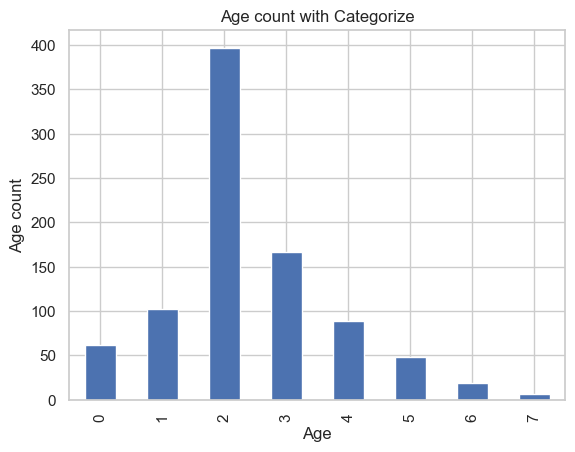

In [124]:
# 카테고리화 이후
# 연령(카테고리화됨) 분포 - 시각화
df_train.groupby(['Age_cat'])['PassengerId'].count().plot.bar()

plt.title('Age count with Categorize')
plt.ylabel('Age count')
plt.xlabel('Age')

plt.show()

In [120]:
# 크로스 테이블로 상관관계 확인

pd.crosstab(df_train['Age_cat'], df_train['Survived'], margins=True)

Survived,0,1,All
Age_cat,,,
0,24,38,62
1,61,41,102
2,268,129,397
3,94,73,167
4,55,34,89
5,28,20,48
6,13,6,19
7,6,1,7
All,549,342,891


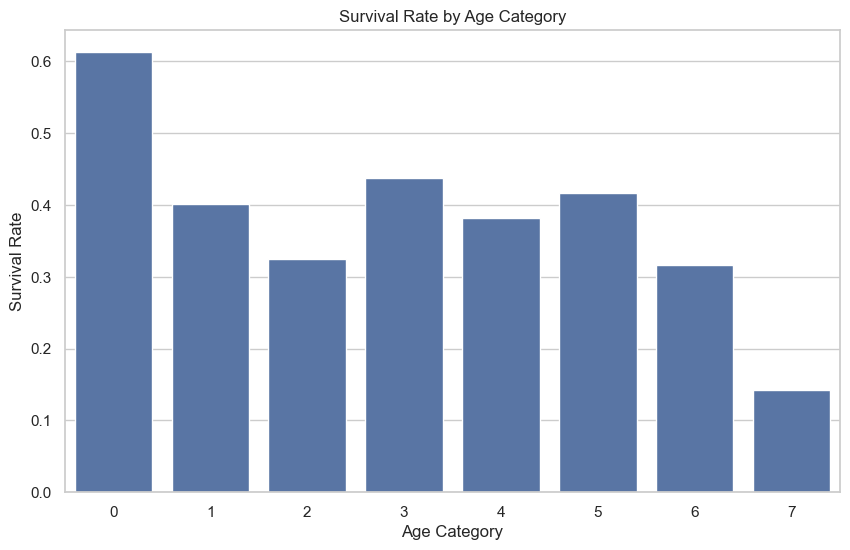

In [128]:
# 연령에 따른 생존률 - 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_cat', y='Survived', data=df_train, ci=None)

plt.title('Survival Rate by Age Category')
plt.ylabel('Survival Rate')
plt.xlabel('Age Category')

plt.show()